#Parte I: Creación de variables, histogramas, kernels yresumen de la base de datos final
La idea de esta primera parte es que completen la limpieza de la base de datos
que contiene las observaciones del primer trimestre de 2004 y del primer
trimestre de 2024. La base final a trabajar resultante debe incluir todas las
variables presentes en ambos trimestres, expresadas de manera homogénea.
Es decir, si la variable CH04 en 2004 toma los valores “Hombre” o “Mujer”, y
en 2024 toma los valores 1 y 2, la variable limpia en la base final debe tener
solamente dos valores consistentes.


#1)
Cree la variable “edad2” definida como edad2 (edad al cuadrado). Presente
un histograma de la variable edad en un panel A, y a la par una
distribución de kernels para los ocupados y desocupados en un panel B
(esto es, son dos lineas de kernel en este segundo panel). Comente
brevemente la distribución de edades en estos dos panels (3-4 oraciones).

In [1]:
import pandas as pd
import numpy as np
import os
import random
#Para crear datos con distribucion normal en otro modulo
from scipy.stats import norm
#Importo matplotlib.pyplot
import matplotlib.pyplot as plt
#Importamos los paquetes para usar kernels
from sklearn.neighbors import KernelDensity
#Instalamos seaborn
!pip install seaborn
import seaborn as sns
#Importamos estos paquetes para usar kernels jerarquicos y dendogramas
from sklearn.neighbors import KernelDensity
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
#Cargamos nuestra base de datos del 2024
url = "https://github.com/RoccoGabrielPimenta/BigDataUBA-Grupo22/raw/refs/heads/main/TP%202/usu_individual_T124.xlsx"
df = pd.read_excel(url)
df.head(5)
pd.set_option('display.max_columns', 6)


In [3]:
#Cargamos nuestra base de datos del 2004
url = "https://github.com/RoccoGabrielPimenta/BigDataUBA-Grupo22/raw/refs/heads/main/TP%202/usu_individual_t104.dta"
df2 = pd.read_stata(url)
df2

,CODUSU,nro_hogar,componente,...,pj2_1,pj3_1,idimpp
0,125098,1.0,1.0,...,0.0,0.0,00000
1,125397,1.0,1.0,...,0.0,0.0,00000
2,125515,1.0,1.0,...,0.0,0.0,00020
3,125558,1.0,1.0,...,0.0,0.0,00000
4,125558,1.0,2.0,...,0.0,0.0,00000
...,...,...,...,...,...,...,...
45284,285733,1.0,1.0,...,0.0,0.0,00000
45285,285733,1.0,2.0,...,0.0,0.0,00000
45286,285733,1.0,3.0,...,0.0,0.0,00000
45287,285733,1.0,4.0,...,0.0,0.0,00000


In [4]:
#lo primero que hacemos es tomar los datos de la region patagonica del año 2004. Para eso filtramos el inclullendo solo aquellas regiones que responden a la patagonia.
#Luego, tomamos los datos de la region patagonica del año 2024. Para eso filtramos el inclullendo solo aquellas regiones que responden al numero 42.
#Para concluir,juantamos las distitas que responden a esta region.
df2[df2["region"]=='Patagónica']
df3 = df[df["REGION"]==42]
df3
df4 = df2[df2["region"]=="Patagónica"]
df4.columns = df4.columns.str.upper()
df4
df_completo = pd.concat([df3,df4],axis=0)
df_completo


,CODUSU,ANO4,TRIMESTRE,...,PJ2_1,PJ3_1,IDIMPP
0,TQRMNOPUTHLMKQCDEGGFB00852588,2024.0,1,...,NaN,NaN,NaN
1,TQRMNOPUTHLMKQCDEGGFB00852588,2024.0,1,...,NaN,NaN,NaN
2,TQRMNOPUTHLMKQCDEGGFB00852588,2024.0,1,...,NaN,NaN,NaN
3,TQRMNOPPWHLLKRCDEGGFB00852574,2024.0,1,...,NaN,NaN,NaN
4,TQRMNOPPWHLLKRCDEGGFB00852574,2024.0,1,...,NaN,NaN,NaN
...,...,...,...,...,...,...,...
45284,285733,2004.0,1er. Trimestre,...,0.0,0.0,00000
45285,285733,2004.0,1er. Trimestre,...,0.0,0.0,00000
45286,285733,2004.0,1er. Trimestre,...,0.0,0.0,00000
45287,285733,2004.0,1er. Trimestre,...,0.0,0.0,00000


In [5]:
#Ubicamos las columnas que vamos a utilizar
columnas = df_completo.columns.to_list()
for i, item in enumerate(columnas, start=0):
    print(i,item)

0 CODUSU
1 ANO4
2 TRIMESTRE
3 NRO_HOGAR
4 COMPONENTE
5 H15
6 REGION
7 MAS_500
8 AGLOMERADO
9 PONDERA
10 CH03
11 CH04
12 CH05
13 CH06
14 CH07
15 CH08
16 CH09
17 CH10
18 CH11
19 CH12
20 CH13
21 CH14
22 CH15
23 CH15_COD
24 CH16
25 CH16_COD
26 NIVEL_ED
27 ESTADO
28 CAT_OCUP
29 CAT_INAC
30 IMPUTA
31 PP02C1
32 PP02C2
33 PP02C3
34 PP02C4
35 PP02C5
36 PP02C6
37 PP02C7
38 PP02C8
39 PP02E
40 PP02H
41 PP02I
42 PP03C
43 PP03D
44 PP3E_TOT
45 PP3F_TOT
46 PP03G
47 PP03H
48 PP03I
49 PP03J
50 INTENSI
51 PP04A
52 PP04B_COD
53 PP04B1
54 PP04B2
55 PP04B3_MES
56 PP04B3_ANO
57 PP04B3_DIA
58 PP04C
59 PP04C99
60 PP04D_COD
61 PP04G
62 PP05B2_MES
63 PP05B2_ANO
64 PP05B2_DIA
65 PP05C_1
66 PP05C_2
67 PP05C_3
68 PP05E
69 PP05F
70 PP05H
71 PP06A
72 PP06C
73 PP06D
74 PP06E
75 PP06H
76 PP07A
77 PP07C
78 PP07D
79 PP07E
80 PP07F1
81 PP07F2
82 PP07F3
83 PP07F4
84 PP07F5
85 PP07G1
86 PP07G2
87 PP07G3
88 PP07G4
89 PP07G_59
90 PP07H
91 PP07I
92 PP07J
93 PP07K
94 PP08D1
95 PP08D4
96 PP08F1
97 PP08F2
98 PP08J1
99 PP08J2
100 

In [6]:
#Indicamos cuáles de esas columnas vamos a estar utilizando
columnas_a_usar = [1,13,19,20,21,27,44,45,132]
columnas_a_usar1 = [27]


In [7]:
#filtramos las columnas que queremos en un nuevo dataset
df_filtrado_24 = df_completo.iloc[0:4513, columnas_a_usar]
df_filtrado_04 = df_completo.iloc[4513:7777, columnas_a_usar]

In [8]:
#filtramos para tener los datos de los dos años en una sola base de datos
df8 = df_filtrado_04
df8["CH06"] = df8["CH06"].replace({'Menos de 1 año':0, '98 y más años':98})
df8['ESTADO'] = df8['ESTADO'].replace({
    'Ocupado': 1,
    'Desocupado': 2,
    'Inactivo': 3,
    "Menor de 10 años" : 4
})
df8["CH12"] = df8["CH12"].replace({"Jardín/Preescolar":0, "Primario":6, "EGB":9, "Secundario":12, "Polimodal":12, "Terciario":18, "Universitario":18, "Posgrado Universitario":24, "Educación especial (discapacitado)":0})
df8["CH13"] = df8["CH13"].replace({"Sí":0, "No":-1, "Ns./Nr.":0})
df8["CH14"] = df8["CH14"].replace({"Ninguno":6, "Primero":5, "Segundo":4, "Tercero":3, "Cuarto":2, "Quinto":1, "Sexto":6, "Séptimo":7, "Octavo":8, "Noveno":9,"Educación especial":0,"Ns/Nr":0})
df8
df9 = df_filtrado_24
df9["CH12"] = df9["CH12"].replace({0:0, 2:6, 3:9, 4:12, 5:12, 6:18, 7:18,8:24, 9:0})
df9["CH13"] = df9["CH13"].replace({0:0, 1.0:-1, 9:0})
df9["CH14"] = df9["CH14"].replace({0:6, 1:5, 2:4,3:3, 4:2, 5:1, 6:6, 7:7,8:8, 9:9, 98:0, 99:0})

<ipython-input-8-4b4572c84b08>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df8["CH06"] = df8["CH06"].replace({'Menos de 1 año':0, '98 y más años':98})
<ipython-input-8-4b4572c84b08>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df8['ESTADO'] = df8['ESTADO'].replace({
<ipython-input-8-4b4572c84b08>:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd

In [9]:
#Limpiamos los datos que no nos interesan y definimos una versión final para la base de datos
ultimo_df = pd.concat([df8, df9],axis=0)
ultimo_df = ultimo_df.replace("NaN", 0)
ultimo_df = ultimo_df.replace([np.nan, -np.inf], 0)
ultimo_df = ultimo_df.apply(pd.to_numeric, errors='coerce').fillna(0)
ultimo_df['CH13'] = ultimo_df['CH13'].replace(2, -1)

pd.set_option("display.max_rows", 8)

ultimo_df

<ipython-input-9-7012e402d759>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ultimo_df = ultimo_df.replace([np.nan, -np.inf], 0)


,ANO4,CH06,CH12,...,PP3E_TOT,PP3F_TOT,P21
42025,2004.0,34.0,12.0,...,36.0,0.0,1000.0
42026,2004.0,62.0,6.0,...,0.0,0.0,1200.0
42027,2004.0,58.0,6.0,...,0.0,0.0,0.0
42028,2004.0,38.0,12.0,...,48.0,0.0,1200.0
...,...,...,...,...,...,...,...
45932,2024.0,34.0,12.0,...,30.0,0.0,160000.0
45933,2024.0,10.0,6.0,...,0.0,0.0,0.0
45934,2024.0,8.0,6.0,...,0.0,0.0,0.0
45935,2024.0,6.0,6.0,...,0.0,0.0,0.0


In [10]:
#Creo la variable que contiene la edad de los encuestados
edad=ultimo_df[["CH06"]]

In [11]:
#Creamos una variable con los datos que vamos a estar usando que son edad estado de desocupacion y el año
df_info = (ultimo_df[["CH06", "ESTADO","ANO4"]])

In [12]:
#Usamos lo anteriormente creado y también añadimos que solo se tome de "ESTADO" Ocupados y Desocupados
edad2=df_info[df_info['ESTADO'].isin([1, 2])]

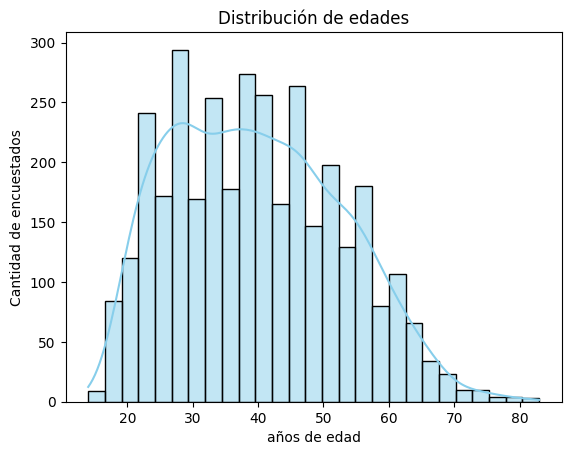

In [13]:
#Graficamos
sns.histplot(data=edad2['CH06'], kde=True, color='skyblue')

plt.title("Distribución de edades")
plt.xlabel("años de edad")
plt.ylabel("Cantidad de encuestados")
plt.show()

In [14]:
#Muy parecido al paso anterior definimos que solo queremos ocupados y desocupados
ocupados = edad2[edad2['ESTADO'] == 'Ocupado']['CH06']
desocupados = edad2[edad2['ESTADO'] == 'Desocupado']['CH06']
edad2['ESTADO'] = edad2['ESTADO'].replace({1: 'ocupado', 2: 'desocupado'})

<ipython-input-14-ce8597cda0cd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edad2['ESTADO'] = edad2['ESTADO'].replace({1: 'ocupado', 2: 'desocupado'})


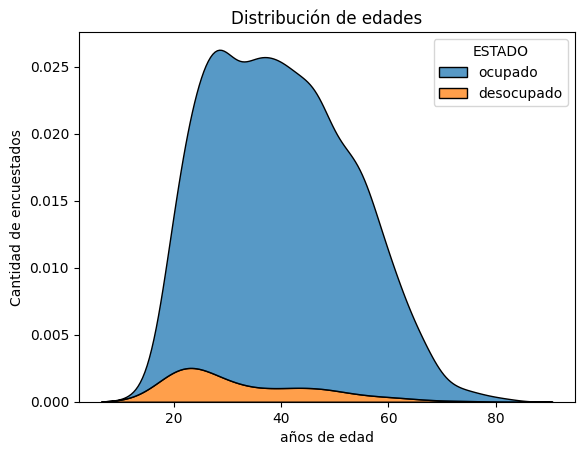

In [15]:
sns.kdeplot(data=edad2, x='CH06',hue="ESTADO",multiple="stack",)  # funcion de kernel de Seaborn
#Graficamos con Kernels
plt.axvline(ocupados.mean(), color='blue', linestyle='dashed', linewidth=1, label='ocupados')
plt.axvline(desocupados.mean(), color='red', linestyle='dashed', linewidth=1, label='desocupados')
plt.title("Distribución de edades")
plt.xlabel("años de edad")
plt.ylabel("Cantidad de encuestados")
plt.show()



#Respuesta:
Lo que se puede observar en el primer grafico es como mediante el crecimiento de la población estudiada, estos van obteniendo trabajo hasta que llega la edad cercana a la jubilación que es donde caen los datos. Lo que se ve en el segundo grafico es que muchas de las personas desempleadas rondan entre los 25-30 años de edad y esto va decreciendo según son mas viejos.

#2)
Cree la variable educ definida como la cantidad de años de educación. Use
inteligentemente las variables CH12, CH13 y CH14 para crearla. Por
ejemplo, si dice que el nivel más alto de educación es “Secundario” (CH12),
“Sí” finalizo este nivel (CH13) y el ultimo año que aprobó (CH14) fue
“sexto”, entonces puede asumir que tiene educ=12, osea 12 años de
educación formal. Presente una estadistica descriptiva (promedio, sd, min,
p50, max) de dicha variable creada y comente


In [16]:
#1ro tomamos la columnas que nos interesan para hacer la variable.
#tomamos los datos CH12 y los remplazamos por el numero de años que equivalen cada nivel de educacion. los datos de CH13 los cambiamos por un 0 en caso de ser 1 y -1 en caso de que no halla terminado.En CH14 le restamos a 6 el ultimo año que curso, exeptuando a los EGB.
educ=(ultimo_df[["CH12", "CH13","CH14"]])
educ
pd.set_option('display.max_rows', 8)
#creamos una variable en bace a esta relacion:
EDUC = educ["CH12"]+educ["CH13"]*educ["CH14"]
EDUC
print(EDUC.describe())


count    7777.000000
mean        8.499679
std         8.303777
min       -98.000000
25%         6.000000
50%         9.000000
75%        12.000000
max        24.000000
dtype: float64


#Respuesta:
El promedio de 8 entre las tres variables se puede tomar como que mas o menos la mayoría de los encuestados termino el nivel secundario.

#3)
Cree la variable salario_semanal como el total de ingresos habituales
(P21) dividido 40. Esta variable nos da una aproximación del salario
semanal suponiendo que la persona trabaja a tiempo completo 8 horas al
dia, 5 dias a la semana (8x5=40). Sin embargo, antes de hacer dicha
división recuerde su bonus de economista. Los pesos de 2004 tienen un
poder de compra distinto a los pesos de 2024 primer trimestre. Convierta
primero los ingresos de 2004 a pesos de 2024.

In [17]:
#inflacion entre el 2004 y el 2024 es un 70.006,46%
salario_semanal=(ultimo_df["P21"])

salario_semana24 = salario_semanal.iloc[0:4513]
salario_semana04 = salario_semanal.iloc[4513:7777]
salario_semana24 = salario_semana24/40
salario_semana04 = salario_semana04*17.501615
salario_semanal  = pd.concat([salario_semana24, salario_semana04],axis=0)
df = salario_semanal[salario_semanal != 0]

df


,P21
42025,2.500000e+01
42026,3.000000e+01
42028,3.000000e+01
42036,1.000000e+01
...,...
45837,4.375404e+06
45838,6.125565e+06
45869,-1.575145e+02
45932,2.800258e+06


#a)
Similar al item 1, presente en un panel A, un histograma de la variable
salario_semanal y las distribuciones de kernels para ocupados y
desocupados en un panel B. Comente brevemente la distribución de
salarios en estos dos panels (3-4 oraciones).

In [18]:
estado=(ultimo_df["ESTADO"])

In [19]:
#pequeña limpieza para no tener en cuenta a los inactivos y menores de 10
df10 = pd.concat([salario_semanal,estado],axis=1)
df10 = df10[df10 != 3]
df10 = df10[df10 != 4]
df10= df10.dropna()
pd.set_option('display.max_rows', 8)
df10

,P21,ESTADO
42025,2.500000e+01,1.0
42026,3.000000e+01,1.0
42028,3.000000e+01,1.0
42036,1.000000e+01,1.0
...,...,...
45837,4.375404e+06,1.0
45838,6.125565e+06,1.0
45869,-1.575145e+02,1.0
45932,2.800258e+06,1.0


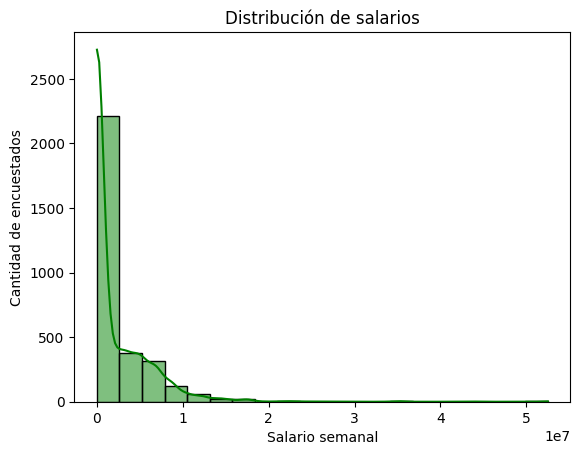

In [20]:
sns.histplot(data=df, kde=True, color='green', bins=20)
plt.title("Distribución de salarios")
plt.xlabel("Salario semanal")
plt.ylabel("Cantidad de encuestados")
plt.show()

<ipython-input-21-eb06cc464489>:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df10, x='P21',hue="ESTADO",multiple="stack",)  # funcion de kernel de Seaborn


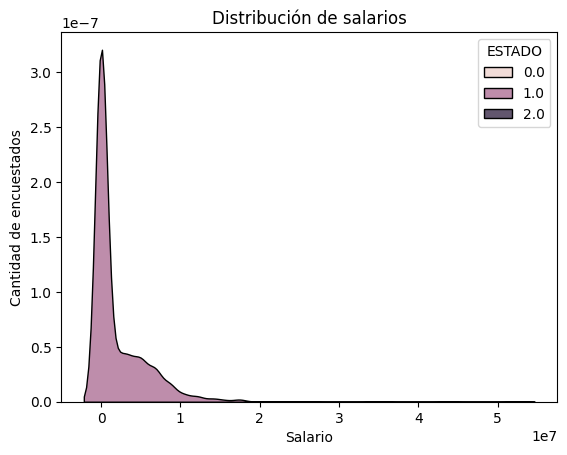

In [21]:


df_info = (df10[["P21", "ESTADO"]])
salario=df_info[df_info['ESTADO'].isin([1, 2])]
ocupados = salario[salario['ESTADO'] == 'Ocupado']['P21']
desocupados = salario[salario['ESTADO'] == 'Desocupado']['P21']

sns.kdeplot(data=df10, x='P21',hue="ESTADO",multiple="stack",)  # funcion de kernel de Seaborn

plt.axvline(ocupados.mean(), color='red', linestyle='dashed', linewidth=1, label='ocupados')
plt.axvline(desocupados.mean(), color='yellow', linestyle='dashed', linewidth=1, label='desocupados')
plt.title("Distribución de salarios")
plt.xlabel("Salario")
plt.ylabel("Cantidad de encuestados")

plt.show()



#4)
Cree la variable horastrab como el total de horas trabajadas como la suma
de las horas en la ocupación principal y otras ocupaciones (PP3E_TOT+
PP3F_TOT). Presente una estadistica descriptiva (promedio, sd, min, p50,
max) de dicha variable creada y comente

In [22]:
#Creo una variable en donde esten las horas de el trabajo principal y el trabajo secundario
horastrab=(ultimo_df[["PP3E_TOT", "PP3F_TOT"]])
pd.set_option('display.max_rows', None)
horastrab
#Sumo los dos dataset con información horaria de trabajo principal y trabajo secundario para obtener las horas totales
HORASTRAB = horastrab["PP3E_TOT"]+horastrab["PP3F_TOT"]
HORASTRAB
print(EDUC.describe())
horastrab.describe()

count    7777.000000
mean        8.499679
std         8.303777
min       -98.000000
25%         6.000000
50%         9.000000
75%        12.000000
max        24.000000
dtype: float64


,PP3E_TOT,PP3F_TOT
count,7777.000000,7777.000000
mean,14.842613,0.514594
std,21.890702,3.214842
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,30.000000,0.000000
max,126.000000,50.000000


#Respuesta
En forma muy parecida al punto 2 se puede observar que entre la dos ocupaciones, tanto la principal como la secundaria, termina trabajando 8 horas en promedio.

#5)
¿Cuál es el tamaño de la de la base de datos para su región con las
variables originales unificadas? Para ello complete la tabla 1 que se le
diseña abajo y comente.

In [23]:
!pip install openpyxl
df_estado_24 = df_completo.iloc[0:4513, columnas_a_usar1]
df_estado_04 = df_completo.iloc[4513:7777, columnas_a_usar1]
df_estado_04['ESTADO'].value_counts()[2]
df_estado_24['ESTADO'].value_counts()[2]
df_estado_04['ESTADO'].value_counts()[1]



<ipython-input-23-048e86afce03>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_estado_04['ESTADO'].value_counts()[2]
<ipython-input-23-048e86afce03>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_estado_04['ESTADO'].value_counts()[1]


np.int64(1238)

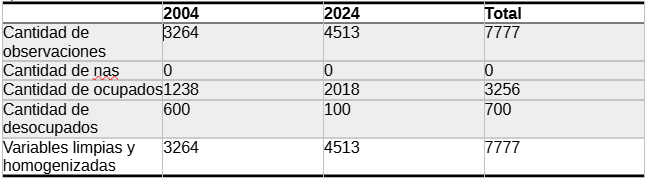

Como comentario rellenar el cuadro con los datos de los ejercicios

#Parte II: Métodos No Supervisados
Esta parte del trabajo práctico tiene como objetivo que realicen un análisis
visual de los datos utilizando las herramientas vistas en clase. En esta parte,
solo necesita utilizar las variables: edad, edad2, educ, salario_semanal y
horastrab.

#1.
Realice una matriz de correlaciones con estos cinco predictores para su
región y comente los resultados.

#2.
PCA con salario: Apliquen PCA a las cinco variables seleccionadas para
esta parte. Recuerde primero estandarizar las variables como el la
Clase 6. En un gráfico de dispersión muestre los indices (scores)
calculados del primer y segundo componente de PCA y comente los
resultados

#3.
Grafique con flechas los pronderadores (loading) de PCA para el primer
y segundo componente y comente los pesos que que le dan a cada
variable utilizada.

#4.
Finalmente, grafique la proporción de la varianza explicada para para
cada uno de los componentes y comente el grafico.

#5. Cluster k-medias:

#a.
Corran el algoritmo con 𝑘 = 2, 𝑘 = 4 y 𝑘 = 10 usando n_init =
20, y grafiquen los resultados usando dos predictores.
Interprétenlos.

In [42]:
#Elijo el predictor salario semanal y horastrab para hacer una comparativa entre, el salario semanal y las horas trabajadas
X1 = np.column_stack((salario_semanal, horastrab))

In [43]:
#Acá fijamos cuanta cantidad de clusters vamos a usar para graficar el modelo
kmeans2 = KMeans(n_clusters=2, random_state=10, init="random", n_init=20).fit(X1)

kmeans4 = KMeans(n_clusters=4, random_state=10, init="random", n_init=20).fit(X1)

kmeans10 = KMeans(n_clusters=10, random_state=10, init="random", n_init=20).fit(X1)

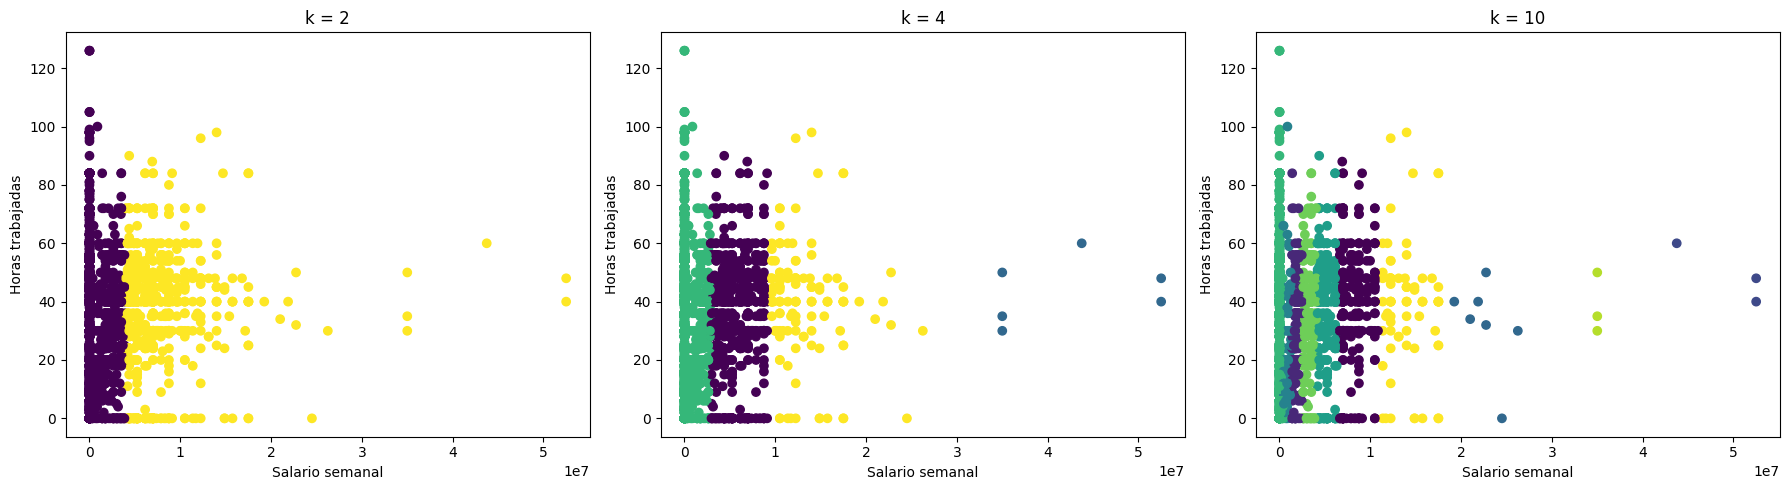

In [44]:
#En este modelo establecemos el entrenamiento de nuestros cluster,Hacemos un loop para entrenalos para distintos clusters
modelos = {}
for k in [2, 4, 10]:
    modelos[k] = KMeans(n_clusters=k, random_state=10, init="random", n_init=20).fit(X1)

fig, axs = plt.subplots(1, 3, figsize=(18, 5))
#Graficamos, usamos enumerate para que nos devuelva una lista indexada y sea facil de mostrar
for i, k in enumerate([2, 4, 10]):
    axs[i].scatter(X1[:, 0], X1[:, 1], c=modelos[k].labels_,)
    axs[i].set_title(f'k = {k}')
    axs[i].set_xlabel('Salario semanal')
    axs[i].set_ylabel('Horas trabajadas')


plt.tight_layout()
plt.show()

#Respuesta:
Se pueden ver varíos saltos en la cantidad de horas que trabajan las personas, se puede ver que incluso gente que trabaja mucha cantidad de horas puede tener un salario muy bajo. Algo interesante son algunas exepciones como uno de los puntos tiene un salario muy alto pero trabaja poca cantidad de horas y así.

#b.
Grafique edad y educ de los resultados de 𝑘 = 2 donde cada
punto tome dos colores, un color para ocupados y otro color para
desocupados. ¿Puede el algoritmo separar correctamente a las
personas ocupadas de las desocupadas? Comenten

In [45]:
#Usamos la edad y la variable educ que contiene cosas como el maximo nivel educactivo de la persona y en donde termino o abandono su educación
X2 = np.column_stack((edad, educ))

In [46]:
#Filtramos la infromacíon de "ESTADO" para que solo nos de Ocupados y Desocupados
ESTADO=ultimo_df[ultimo_df['ESTADO'].isin([1, 2])]

In [47]:
#De nuevo establcemos la cantidad de clusters
kmeans2 = KMeans(n_clusters=2, random_state=10, init="random", n_init=20).fit(X2)

Text(0, 0.5, 'Nivel educativo')

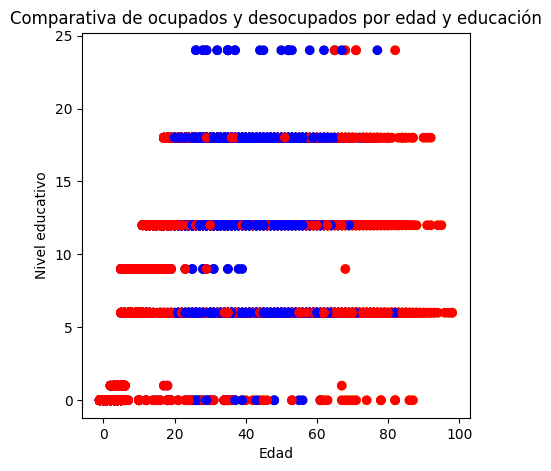

In [48]:
#Graficámos
fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.scatter(X2[:,0], X2[:,1], c=kmeans2.labels_)
#¡IMPORTANTE! remarcar que el color azul es para OCUPADOS y el rojo para DESOCUPADOS
colores = ['blue' if e == 1 else 'red' for e in estado]  # 1: Ocupado, 2: Desocupado
ax.scatter(X2[:, 0], X2[:, 1], c=colores)
ax.set_title("Comparativa de ocupados y desocupados por edad y educación")
ax.set_xlabel("Edad")
ax.set_ylabel("Nivel educativo")

#Respuesta:
Se puede observar como las personas con nivel educativo alto suelen estar empleados hasta su jubilación. Y contraposición en el nivel educativo que la gente empieza a trabajar se ven mas baches rojo osea desempleados.

#6.
Cluster jerárquico: utilizando las variables mencionadas arriba,
realicen un análisis de clustering jerárquico. Generen un dendograma
y expliquen brevemente qué es un dendograma.

In [31]:
#Creamos los datos utilizando las variables creadas anteriormente
x1 = [edad]
x2 = [educ]

data = list(zip(x1, x2))

In [32]:
#Transformamos la data para que se pueda utilizar el cluster jerarquico
data = np.column_stack((edad, educ))
data_std = StandardScaler().fit_transform(data)

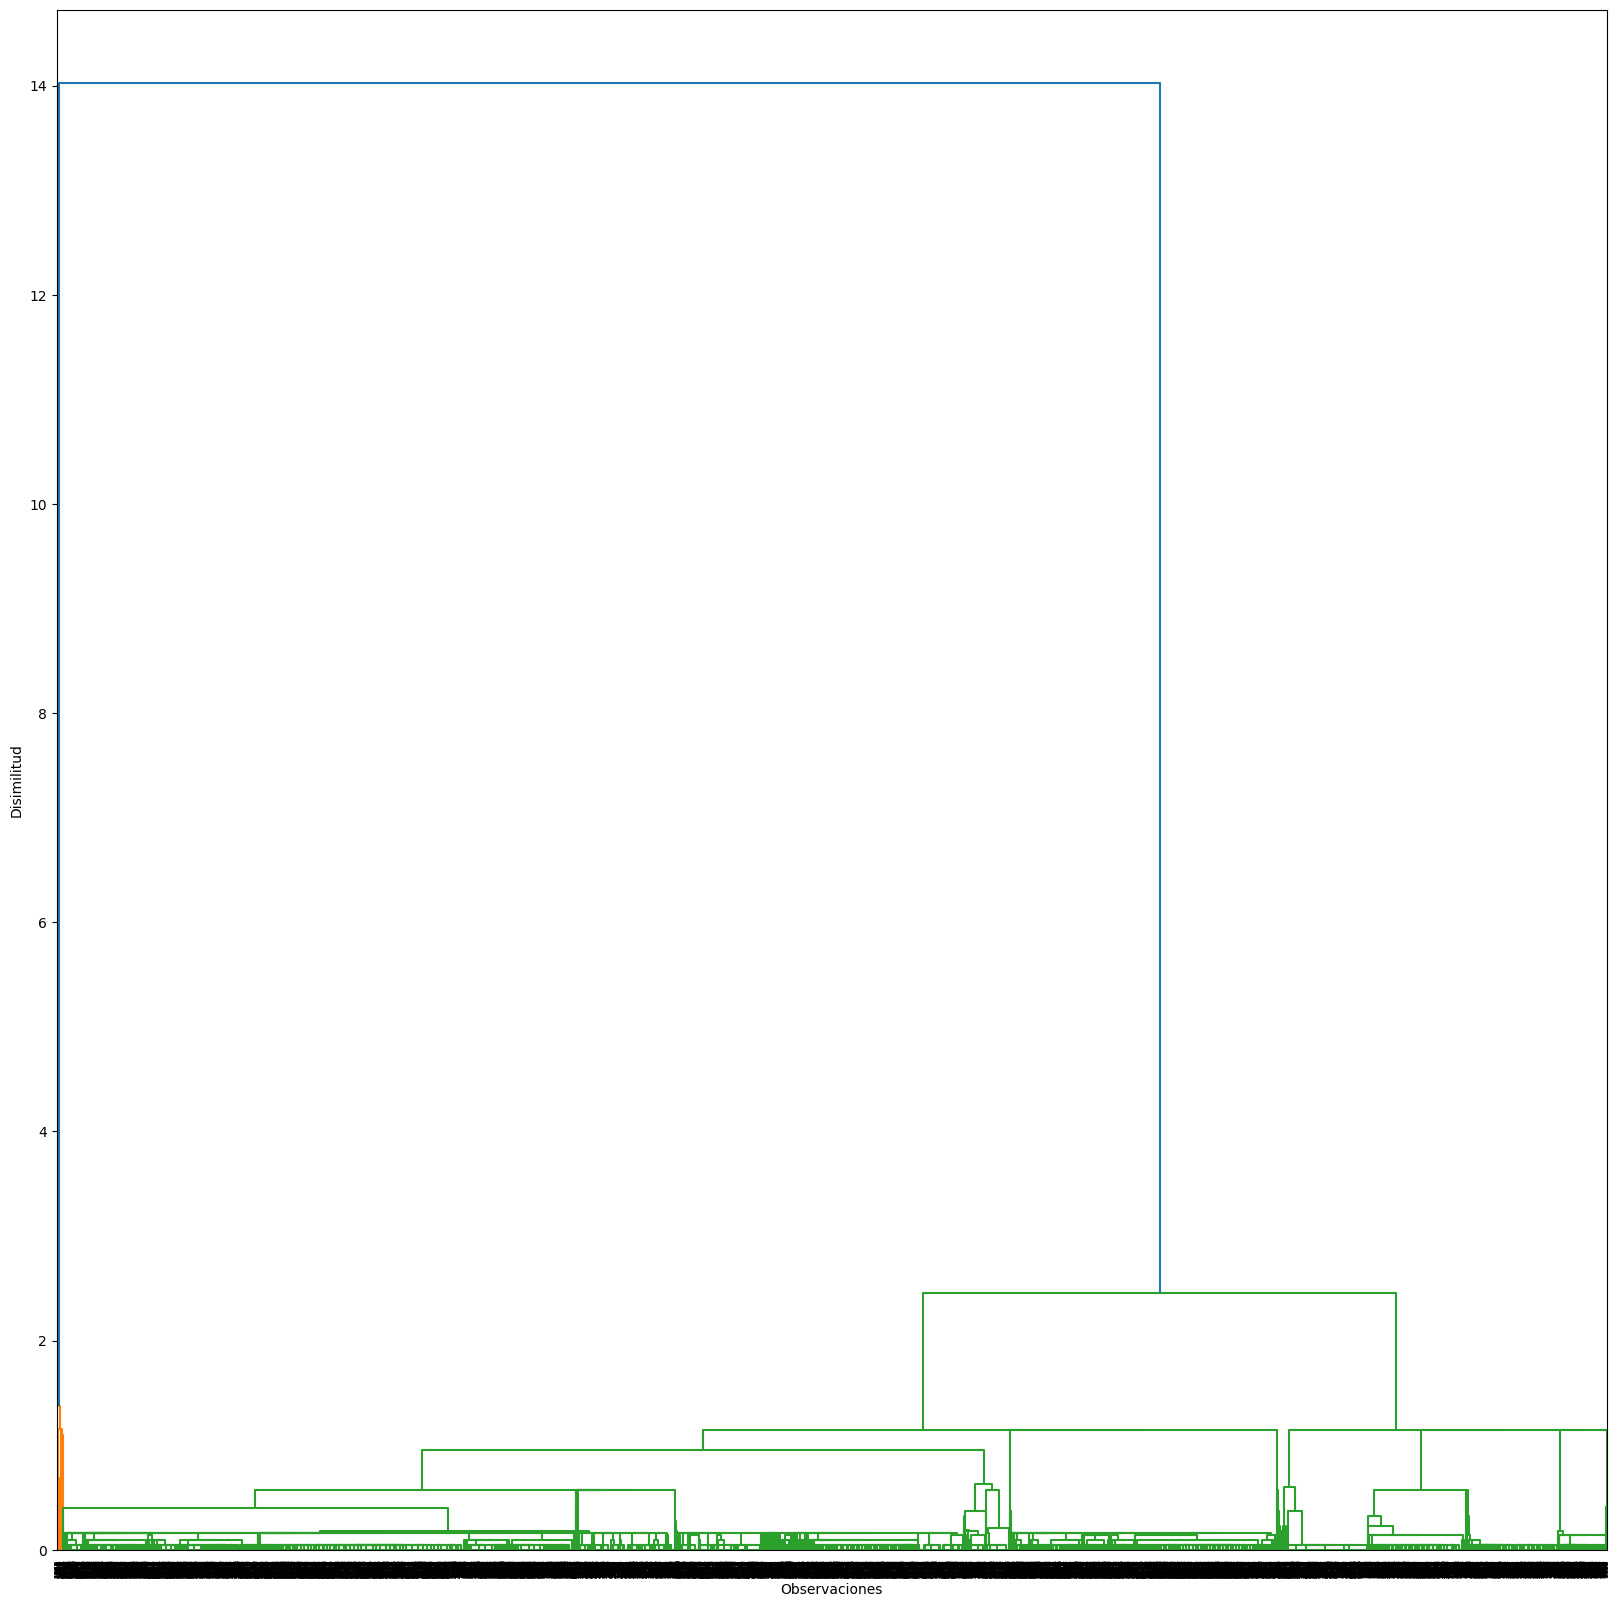

In [33]:
#Usamos linkage con nuestra data transformada para realizar un agrupamiento jerarquico
linkage_data = linkage(data_std, metric='euclidean')

#Graficamos el dendrograma
fig, ax = plt.subplots(figsize=(20,20))
dendrogram(linkage_data)
ax.set_xlabel("Observaciones")
ax.set_ylabel("Disimilitud")
fig.show()

#Respuesta:
Basicamente un dendrograma es un grafico para mostrar agrupaciónes jerarquicas, en este caso por la cantidad de datos es dificil sacar una conjetura del mismo, mas o menos nos muestra como jerarquicamente la variable educ es modificada por edad.